# Feature Selection Method Based on Grey Wolf Optimization for Coronary Artery Disease Classification

In [1]:
import random
import time
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import benchmarks

data = pd.read_csv("iot_dataset.csv")
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [3]:
data["Hours"]= data['date'].apply(lambda x : x.split()[1][:2])
data["Minutes"]= data['date'].apply(lambda x : x.split()[1][3:5])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
 7   Hours          20560 non-null  object 
 8   Minutes        20560 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.4+ MB


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Minutes
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,14,19
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,14,19
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,14,21
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,14,22
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,14,23


In [4]:
data['Time'] = data['Hours'] + '.' + data['Minutes']
data['Time'] = data['Time'].astype('float64')
data.drop(['date', 'Hours', 'Minutes'], axis = 1, inplace = True)
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Time
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14.19
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14.19
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14.21
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14.22
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14.23


In [5]:
data = data.reindex(columns=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Time', 'Occupancy'])
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Time,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,14.19,1
1,23.7180,26.290,578.400000,760.400000,0.004773,14.19,1
2,23.7300,26.230,572.666667,769.666667,0.004765,14.21,1
3,23.7225,26.125,493.750000,774.750000,0.004744,14.22,1
4,23.7540,26.200,488.600000,779.000000,0.004767,14.23,1


In [6]:
data.shape

(20560, 7)

### Data preprocessing, extraction and splitting

In [7]:
X = data.iloc[:,:6].values
Y = data['Occupancy'].values
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 14)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(20560, 6)


### Applying SVM classification without data processing

In [8]:
svcclassifier = SVC(kernel = 'sigmoid', random_state = 50)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
P_SVC = accuracy_score(y_pred,y_test)
print("Accuracy score for SVM:",P_SVC)

Accuracy score for SVM: 0.8860651750972762


### Applying Naive Bayes classification without data processing

In [9]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)
y_pred = NBclassifier.predict(X_test)
P_NB = accuracy_score(y_test, y_pred)
print("Accuracy score for Naive Bayes:",P_NB)

Accuracy score for Naive Bayes: 0.9620622568093385


### Applying Decision Tree classification without data processing

In [10]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)
y_pred = DTclassifier.predict(X_test)
P_DT = accuracy_score(y_test, y_pred)
print("Accuracy score for Decision Tree:",P_DT)

Accuracy score for Decision Tree: 0.9925826848249028


### Applying Random Forest classification without data processing

In [11]:
RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
P_RF = accuracy_score(y_test, y_pred)
print("Accuracy score for Random Forest:",P_RF)

Accuracy score for Random Forest: 0.9931906614785992


### Visual comparison of the different accuracies obtained

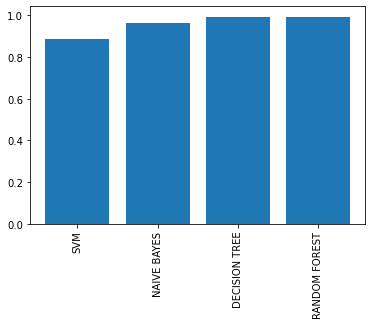

In [12]:
# # sns.barplot(x = ['P_SVC', 'P_NB', 'P_DT', 'P_RF'])
x = ['SVM', 'NAIVE BAYES', 'DECISION TREE', 'RANDOM FOREST']
y = [P_SVC, P_NB, P_DT, P_RF]
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

### GWO Optimization algo

In [13]:
def GWO(objf,lb,ub,dim,SearchAgents_no,Max_iter):
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros(dim)
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros(dim)
    Beta_score=float("inf")
    
    Delta_pos=np.zeros(dim)
    Delta_score=float("inf")

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    
    #Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(dim):
        Positions[:, i] = np.random.uniform(0,1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]
    
    Convergence_curve=np.zeros(Max_iter)

     # Loop counter
    print("GWO is optimizing  \""+objf.__name__+"\"")    

    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i,j]=np.clip(Positions[i,j], lb[j], ub[j])

            # Calculate objective function for each search agent
            fitness=objf(Positions[i,:])
            
            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score :
                Alpha_score=fitness; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness<Beta_score ):
                Beta_score=fitness  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score): 
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:].copy()
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        # Update the Position of search agents including omegas
        for i in range(0,SearchAgents_no):
            for j in range (0,dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2       
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)        
        Convergence_curve[l]=Alpha_score;
    
    print(Positions.shape)
    print("Alpha position=",Alpha_pos);
    print("Beta position=",Beta_pos);
    print("Delta position=",Delta_pos);
    return Alpha_pos,Beta_pos,Delta_pos;


### Setting GWO parameters

In [14]:
iters=100
wolves=5
dimension=7
search_domain=[0,1]
lb=-1.28
ub=1.28
colneeded=[0,1,2,3,4,5]
modified_data=pd.DataFrame()
for i in colneeded:
    modified_data[data.columns[i]]=data[data.columns[i]].astype(float)
func_details=benchmarks.getFunctionDetails(6)

for i in range(0,10):
    alpha,beta,delta=GWO(getattr(benchmarks,'F7'),lb,ub,dimension,wolves,iters)

GWO is optimizing  "F7"
(5, 7)
Alpha position= [-0.13426254 -0.04466311  0.14865445  0.07470467 -0.1689463   0.14756634
 -0.08214182]
Beta position= [-0.16842406 -0.04572905  0.15488092  0.06435017 -0.16067395  0.1647688
 -0.09090084]
Delta position= [-0.11512708 -0.04806286  0.15128496  0.06788044 -0.16203411  0.13412484
 -0.08257456]
GWO is optimizing  "F7"
(5, 7)
Alpha position= [ 0.16359967  0.05904437  0.18937915 -0.07537781  0.00368779 -0.0352077
 -0.13226393]
Beta position= [ 0.17055275  0.05430927  0.21019792 -0.07282679  0.00478255 -0.03970266
 -0.11934366]
Delta position= [ 0.16313735  0.05303271  0.20641374 -0.06961554  0.00447996 -0.0387063
 -0.12169517]
GWO is optimizing  "F7"
(5, 7)
Alpha position= [-0.03492843 -0.09868027 -0.02638889 -0.1110447  -0.17719482  0.12514262
  0.01027498]
Beta position= [-0.03598355 -0.13419133 -0.01737592 -0.08061397 -0.14424163  0.11940174
 -0.0166108 ]
Delta position= [-0.02674801 -0.1187523  -0.02262009 -0.09437465 -0.16917583  0.11892255


In [15]:
##Applying feature selection on the given dataset
##considering alpha as best solution and putting a threshold
threshold=-0.05
index=[]
print("alpha shape =",alpha.shape[0])
modified_daata=pd.DataFrame();
for i in range(1,alpha.shape[0]):
    if(alpha[i]>=threshold):
        modified_daata[data.columns[i]]=data[data.columns[i]].astype(float)
print("The modified data is following")
modified_daata.head()

alpha shape = 7
The modified data is following


,Humidity,Light,HumidityRatio,Time
0,26.272,585.200000,0.004764,14.19
1,26.290,578.400000,0.004773,14.19
2,26.230,572.666667,0.004765,14.21
3,26.125,493.750000,0.004744,14.22
4,26.200,488.600000,0.004767,14.23


### Data preprocessing, extraction and splitting

In [16]:
Y = data['Occupancy'].values
X_train, X_test, y_train, y_test = train_test_split(modified_daata, Y, test_size = 0.40, random_state = 14)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[0])
modified_daata.info()

[-0.06900239 -0.61731087 -0.40005171  1.35983081]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity       20560 non-null  float64
 1   Light          20560 non-null  float64
 2   HumidityRatio  20560 non-null  float64
 3   Time           20560 non-null  float64
dtypes: float64(4)
memory usage: 642.6 KB


### Applying svm on the modified data

In [17]:
svcclassifier = SVC(kernel = 'sigmoid', random_state = 50)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
P1_SVC=accuracy_score(y_pred,y_test)
print("Modified Accuracy score for SVM:", P1_SVC)
print("Earlier Accuracy score was", P_SVC)

Modified Accuracy score for SVM: 0.9173151750972762
Earlier Accuracy score was 0.8860651750972762


### Applying Naive Bayes classification without data processing

In [18]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)
y_pred = NBclassifier.predict(X_test)
P1_NB=accuracy_score(y_pred,y_test)
print("Modified Accuracy score for SVM:", P1_NB)
print("Earlier Accuracy score was", P_NB)

Modified Accuracy score for SVM: 0.9669260700389105
Earlier Accuracy score was 0.9620622568093385


### Applying Decision Tree classification without data processing

In [19]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)
y_pred = DTclassifier.predict(X_test)
P1_DT=accuracy_score(y_pred,y_test)
print("Modified Accuracy score for SVM:", P1_DT)
print("Earlier Accuracy score was", P_DT)

Modified Accuracy score for SVM: 0.9928258754863813
Earlier Accuracy score was 0.9925826848249028


### Applying Random Forest classification without data processing

In [20]:
RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
P1_RF=accuracy_score(y_pred,y_test)
print("Modified Accuracy score for SVM:", P1_RF)
print("Earlier Accuracy score was", P_RF)

Modified Accuracy score for SVM: 0.9931906614785992
Earlier Accuracy score was 0.9931906614785992


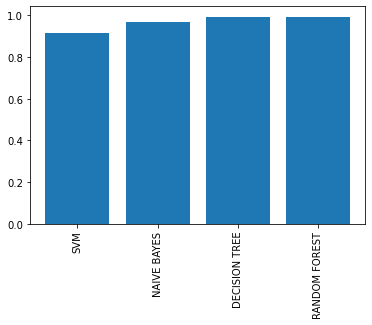

In [21]:
x = ['SVM', 'NAIVE BAYES', 'DECISION TREE', 'RANDOM FOREST']
y = [P1_SVC, P1_NB, P1_DT, P1_RF]
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()